In [57]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [58]:
def check_training_shapes(train_dir):
    train_files = sorted([f for f in os.listdir(train_dir) if f.endswith('.npz')])
    print("Đang kiểm tra các file training (số files: {}):".format(len(train_files)))
    for f in train_files:
        file_path = os.path.join(train_dir, f)
        data = np.load(file_path)
        image = data['image']
        label = data['label']
        print(f"File: {f} => Image shape: {image.shape}, Label shape: {label.shape}")

In [59]:
def check_testing_shapes(test_dir):
    test_files = sorted([f for f in os.listdir(test_dir) if f.endswith('.npy.h5')])
    print("Đang kiểm tra các file testing (số files: {}):".format(len(test_files)))
    for f in test_files:
        file_path = os.path.join(test_dir, f)
        with h5py.File(file_path, "r") as hf:
            image = hf['image'][:]
        print (f"File: {f} => Voulume shape: {image.shape}")

In [60]:
processed_train_dir = os.path.join("data", "synapse", "processed", "train")
processed_test_dir = os.path.join("data", "synapse", "processed", "test")

In [61]:
print("=== Kiểm tra shape của tập TRAINING ===")
check_training_shapes(processed_train_dir)

=== Kiểm tra shape của tập TRAINING ===
Đang kiểm tra các file training (số files: 890):
File: det0000101_slice_000.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_001.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_002.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_003.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_004.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_005.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_006.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_007.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_008.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_009.npz => Image shape: (224, 224), Label shape: (224, 224)
File: det0000101_slice_010.npz => Image shape: (224, 224), Label shape: (224, 224

In [62]:
print("\n=== Kiểm tra shape của tập TESTING ===")
check_testing_shapes(processed_test_dir)


=== Kiểm tra shape của tập TESTING ===
Đang kiểm tra các file testing (số files: 72):
File: det0000301.npy.h5 => Voulume shape: (224, 224, 16)
File: det0000601.npy.h5 => Voulume shape: (224, 224, 8)
File: det0000701.npy.h5 => Voulume shape: (224, 224, 11)
File: det0007301.npy.h5 => Voulume shape: (224, 224, 14)
File: det0007401.npy.h5 => Voulume shape: (224, 224, 13)
File: det0007501.npy.h5 => Voulume shape: (224, 224, 12)
File: det0007601.npy.h5 => Voulume shape: (224, 224, 13)
File: det0007801.npy.h5 => Voulume shape: (224, 224, 10)
File: det0008301.npy.h5 => Voulume shape: (224, 224, 13)
File: det0008501.npy.h5 => Voulume shape: (224, 224, 12)
File: det0008601.npy.h5 => Voulume shape: (224, 224, 14)
File: det0008701.npy.h5 => Voulume shape: (224, 224, 13)
File: det0009101.npy.h5 => Voulume shape: (224, 224, 10)
File: det0009401.npy.h5 => Voulume shape: (224, 224, 12)
File: det0009501.npy.h5 => Voulume shape: (224, 224, 11)
File: det0009701.npy.h5 => Voulume shape: (224, 224, 15)
Fi

In [63]:
# Đường dẫn đến thư mục chứa dữ liệu đã xử lý cho tập train
processed_train_dir = os.path.join("data", "acdc", "processed", "train")

# Đường dẫn đầy đủ đến file cần load, ví dụ: "patient001_frame01_slice_000.npz"
file_path = os.path.join(processed_train_dir, "patient001_frame01_slice_001.npz")

# Load file .npz
data = np.load(file_path)

# Lấy ảnh và nhãn từ file, mỗi key chứa một mảng numpy riêng
image = data["image"]
label = data["label"]

print("Image shape:", image.shape)
print("Label shape:", label.shape)


Image shape: (224, 224)
Label shape: (224, 224)


In [64]:
def display_training_sample(file_path):
    """
    Hiển thị ảnh training và ảnh label tương ứng từ file .npz.

    Parameters:
        file_path (str): Đường dẫn đến file .npz chứa ảnh và label.
    """
    # Load file .npz
    data = np.load(file_path)

    # Lấy ảnh và nhãn từ file
    image = data["image"]
    label = data["label"]

    # Kiểm tra kích thước
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Training Image")
    axes[0].axis("off")

    axes[1].imshow(label, cmap="jet", alpha=0.7)
    axes[1].set_title("Label Mask")
    axes[1].axis("off")

    plt.show()

Image shape: (224, 224)
Label shape: (224, 224)


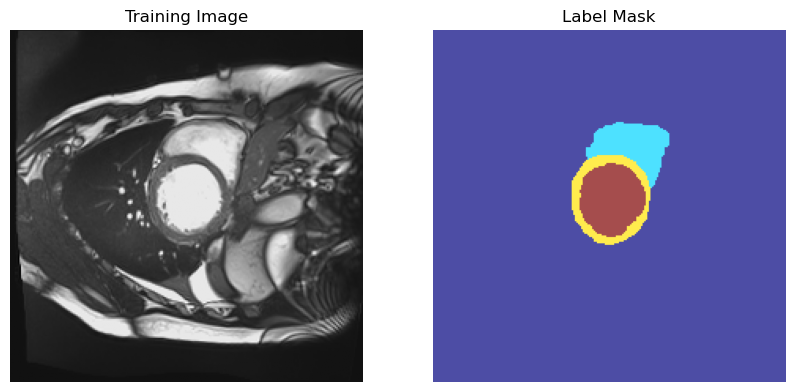

In [65]:
display_training_sample(file_path)

In [66]:
def display_volume(file_path, slice_indices=None):
    """
    Load volume từ file .h5 và hiển thị các slice cho image và label (nếu có).

    Args:
        file_path (str): Đường dẫn đến file .h5.
        slice_indices (list, optional): Danh sách index các slice muốn hiển thị.
                                        Nếu None, sẽ chọn slice đầu, giữa, và cuối.
    """
    with h5py.File(file_path, 'r') as hf:
        image = hf['image'][:]  # shape: (H, W, D)
        # Nếu có dataset 'label', load label, ngược lại tạo mảng zeros.
        label = hf['label'][:] if 'label' in hf else np.zeros_like(image)

    num_slices = image.shape[2]
    if slice_indices is None:
        slice_indices = [0, num_slices // 2, num_slices - 1]

    n_rows = len(slice_indices)
    n_cols = 2  # 1 cột cho image, 1 cột cho label

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))
    if n_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, idx in enumerate(slice_indices):
        # Hiển thị image slice
        axes[i, 0].imshow(image[:, :, idx], cmap='gray')
        axes[i, 0].set_title(f"Image slice {idx}")
        axes[i, 0].axis('off')
        # Hiển thị label slice
        axes[i, 1].imshow(label[:, :, idx], cmap='gray')
        axes[i, 1].set_title(f"Label slice {idx}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

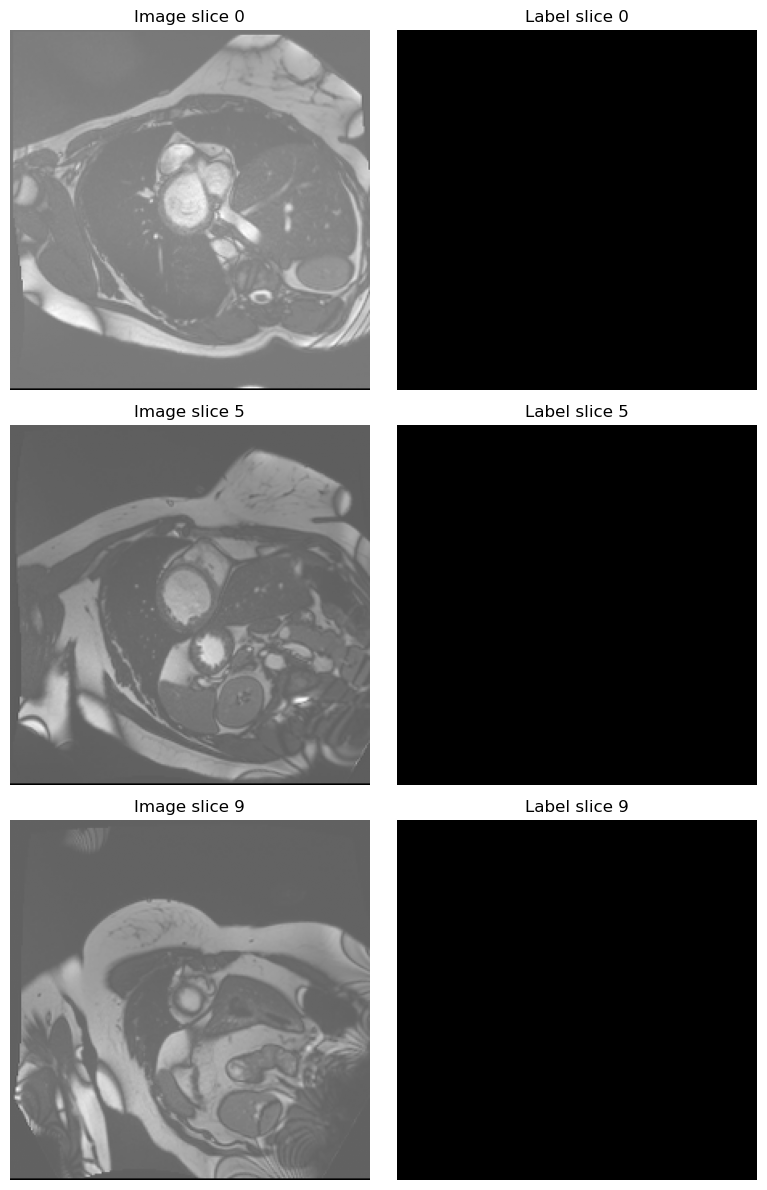

In [67]:
test_file_path = "data/acdc/processed/test/patient101_frame01.npy.h5"
display_volume(test_file_path)